# Projet d'analyse bayésienne

 # https://www.kaggle.com/datasets/zain280/data-science-salaries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm
import arviz as az
import warnings
# Ignorer les FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# L'analyse exploratoire des données

In [ ]:
df = pd.read_csv('ds_salaries.csv', sep = ',')

In [ ]:
df.head()

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
df = df.drop('id', axis = 1)

In [ ]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [ ]:
df2 = pd.get_dummies(data=df, columns=[ 'work_year', 'job_title',  'company_location'],dtype=int)

In [ ]:
# Utiliser filter pour sélectionner les colonnes qui commencent par les chaînes spécifiées
filtered_stats_descriptive = df2.describe().filter(regex='^(work_year|job_title|company_location|salary_in_usd)')

# Afficher les statistiques descriptives filtrées
print(filtered_stats_descriptive)

       salary_in_usd  work_year_2020  work_year_2021  work_year_2022  \
count     607.000000      607.000000      607.000000      607.000000   
mean   112297.869852        0.118616        0.357496        0.523888   
std     70957.259411        0.323603        0.479658        0.499841   
min      2859.000000        0.000000        0.000000        0.000000   
25%     62726.000000        0.000000        0.000000        0.000000   
50%    101570.000000        0.000000        0.000000        1.000000   
75%    150000.000000        0.000000        1.000000        1.000000   
max    600000.000000        1.000000        1.000000        1.000000   

       job_title_3D Computer Vision Researcher  job_title_AI Scientist  \
count                               607.000000              607.000000   
mean                                  0.001647                0.011532   
std                                   0.040589                0.106855   
min                                   0.000000         


- Les statistiques descriptives pour la variable 'salary_in_usd' révèlent une moyenne de 112297,87 dollars avec un écart type de 70957,26 dollars, indiquant une variabilité significative des salaires dans l'échantillon. Le salaire minimum est de 2859 dollars tandis que le maximum atteint 600000 dollars, avec une médiane de 101570 dollars, soulignant la répartition diversifiée des salaires dans l'échantillon.
- La répartition des années de travail montre une concentration plus élevée d'observations pour l'année 2022, suivie de 2021 et 2020.
- Les différentes catégories d'emploi présentent des fréquences variées dans l'ensemble de données, avec certaines catégories plus représentées que d'autres.
- La répartition des entreprises par localisation indique une prédominance des entreprises situées aux États-Unis, suivies par d'autres localisations.

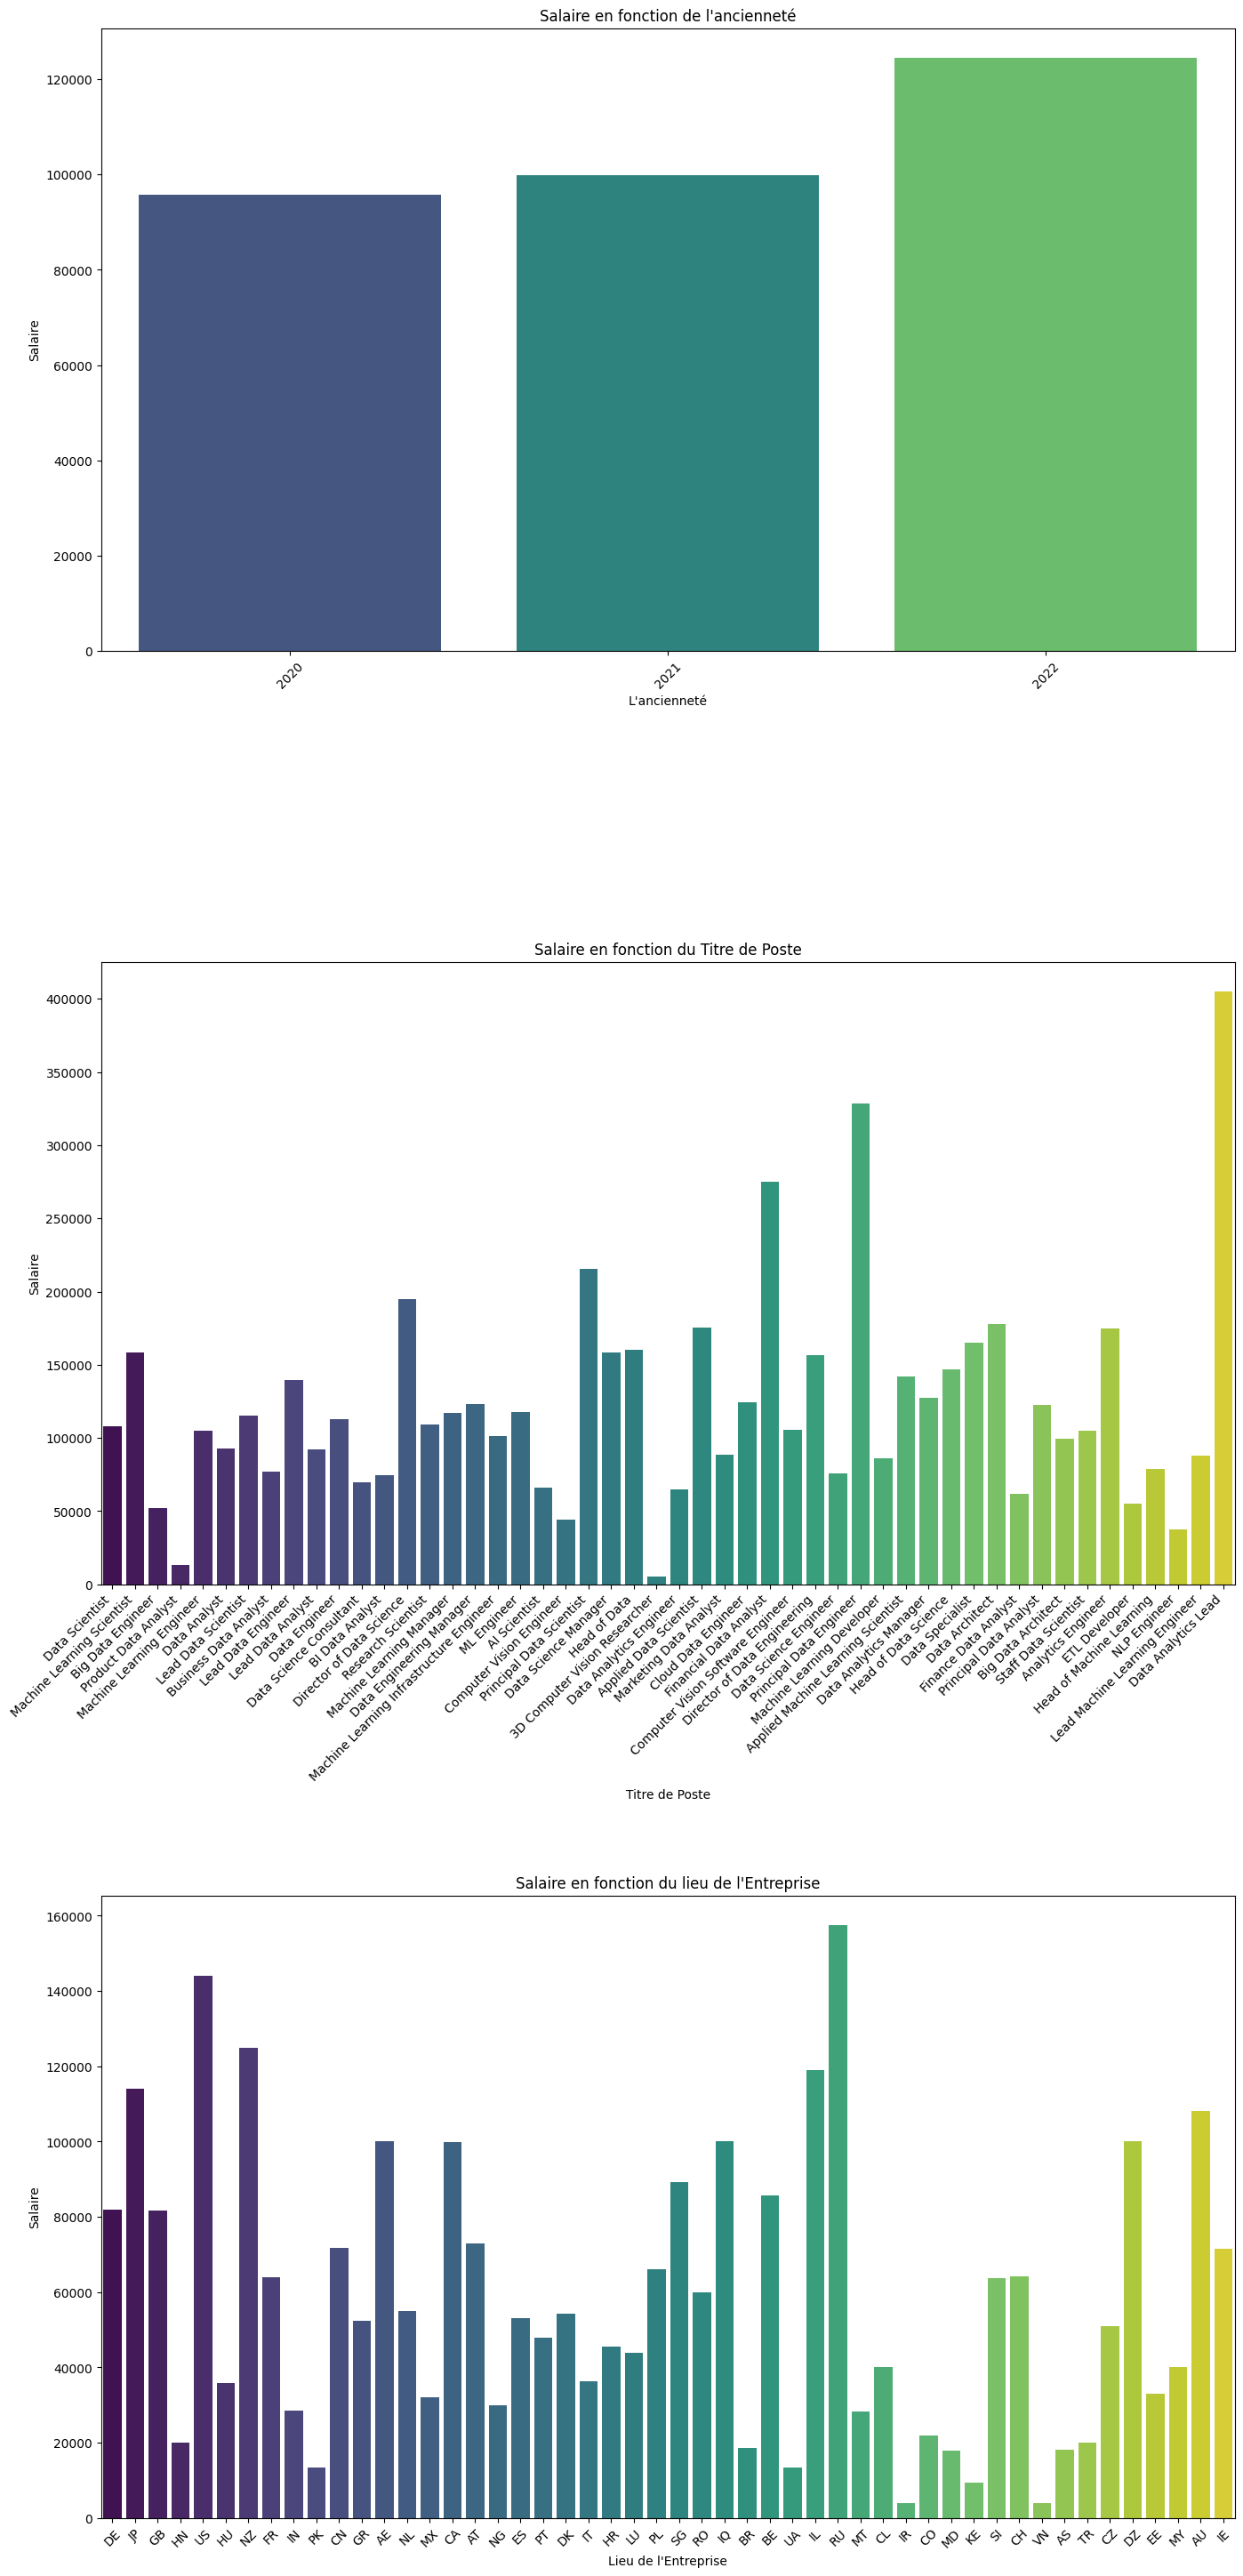

In [ ]:
# Graphique 1 : Salaire en fonction de l'ancienneté
plt.figure(figsize=(15,4))
plt.subplot(311)
sns.barplot(x='work_year', y='salary_in_usd', data=df, ci=None, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel('L\'ancienneté')
plt.ylabel('Salaire')
plt.title('Salaire en fonction de l\'ancienneté')

# Graphique 2 : Salaire en fonction du Titre de Poste
plt.subplot(312)
sns.barplot(x='job_title', y='salary_in_usd', data=df, ci=None, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Titre de Poste')
plt.ylabel('Salaire')
plt.title('Salaire en fonction du Titre de Poste')

# Graphique 3 : Salaire en fonction du lieu de l'Entreprise
plt.subplot(313)
sns.barplot(x='company_location', y='salary_in_usd', data=df, ci=None, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel('Lieu de l\'Entreprise')
plt.ylabel('Salaire')
plt.title('Salaire en fonction du lieu de l\'Entreprise')

# Ajuster l'espacement entre les sous-graphiques
plt.subplots_adjust(top=10, bottom=3, left=0.10, right=0.95, hspace=0.5, wspace=0.40)

# Afficher les graphiques
plt.show()

1)Dans le premier graphique, il est apparent que les rémunérations étaient plus élevées en 2022.

2)Dans le deuxième graphique, on constate que le poste de "Data Analytics Lead" a été rémunéré plus généreusement que les autres titres de poste.

3)Dans le troisième graphique, il est évident que les salaires des "Data Scientists" étaient plus élevés dans les entreprises situées en Russie.

Une remarque pertinente : étant donné le grand nombre de données, il peut être difficile de générer des boxplots et des matrices de corrélation de manière efficace.

# La régression linéaire multiple


In [ ]:
# Modification les noms des variables
work_year = df['work_year']
job_title = df['job_title']
location = df['company_location']
salary_in_usd = df['salary_in_usd']

# Traitement des variables catégorielles en variables indicatrices
job_title_encoded = pd.get_dummies(job_title, prefix='job_title')
location_encoded = pd.get_dummies(location, prefix='location')
work_year_encoded = pd.get_dummies(work_year, prefix='work_year')

Ces codes préparent les données en extrayant les variables d'intérêt et en les transformant en variables indicatrices, ce qui permet de les utiliser dans des analyses

In [ ]:
#Conversion en log
salary_in_usd_log=np.log10(salary_in_usd)

J'ai utilisé la tranformation logarithmique à la variable cible pour améliorer la qualité du modèle et faciliter l'interprétation des résultats.

In [ ]:
#Moyenne de salaire
mean_log_salary = np.mean(salary_in_usd_log)

In [ ]:
# Définition du modèle probabiliste avec distributions a priori ajustées
with pm.Model() as regression_multiple:
    # Paramètres du modèle avec distributions a priori ajustées
    α_multiple = pm.Normal('α_multiple', mu=mean_log_salary, sigma=1)  # Distribution normale centrée autour de la moyenne logarithmique des salaires
    β_work_year_multiple = pm.Normal('β_work_year_multiple', mu=0, sigma=1, shape = work_year_encoded.shape[1])
    β_job_multiple = pm.Normal('β_job_multiple', mu=0, sigma=1, shape=job_title_encoded.shape[1])
    β_loc_multiple = pm.Normal('β_loc_multiple', mu=0, sigma=1, shape=location_encoded.shape[1])
    ϵ_multiple = pm.HalfCauchy('ϵ_multiple', 5)

    # Modèle linéaire
    μ_multiple = α_multiple + pm.math.dot(work_year_encoded.values, β_work_year_multiple) + pm.math.dot(job_title_encoded.values, β_job_multiple) + pm.math.dot(location_encoded.values, β_loc_multiple)

    # Vraisemblance
    y_pred_multiple = pm.Normal('y_pred_multiple', mu=μ_multiple, sigma=ϵ_multiple, observed=salary_in_usd_log)
    # Échantillonnage des paramètres du modèle
    sdata_2 = pm.sample(2000)



C'est un modèle bayésien qui tente de modéliser la relation entre les variables explicatives (années de travail, titres de poste, lieu de travail) et la variable cible (salaire) en utilisant une approche probabiliste. Les distributions a priori ajustées sont utilisées pour exprimer les connaissances préalables sur les paramètres du modèle.

- Les paramètres du modèle comprennent l'intercept (α_multiple) et les coefficients des variables explicatives (β_work_year_multiple, β_job_multiple, β_loc_multiple). L'intercept est associé à une distribution normale centrée autour de la moyenne logarithmique des salaires. Les autres coefficients sont également associés à une distribution normale centrée autour de zéro, avec un écart-type de 1. 'ϵ_multiple' est lié à une distribution Half-Cauchy, ce qui permet de modéliser la variabilité non expliquée dans la variable cible par les variables explicatives du modèle.

- La variable cible observée (salary_in_usd_log) suit une distribution normale avec une moyenne égale à la prédiction du modèle (μ_multiple) et un écart-type représenté par la variable ϵ_multiple.

- Les paramètres du modèle sont échantillonnés à l'aide de la méthode MCMC (Chaînes de Markov Monte Carlo), avec 2000 itérations.



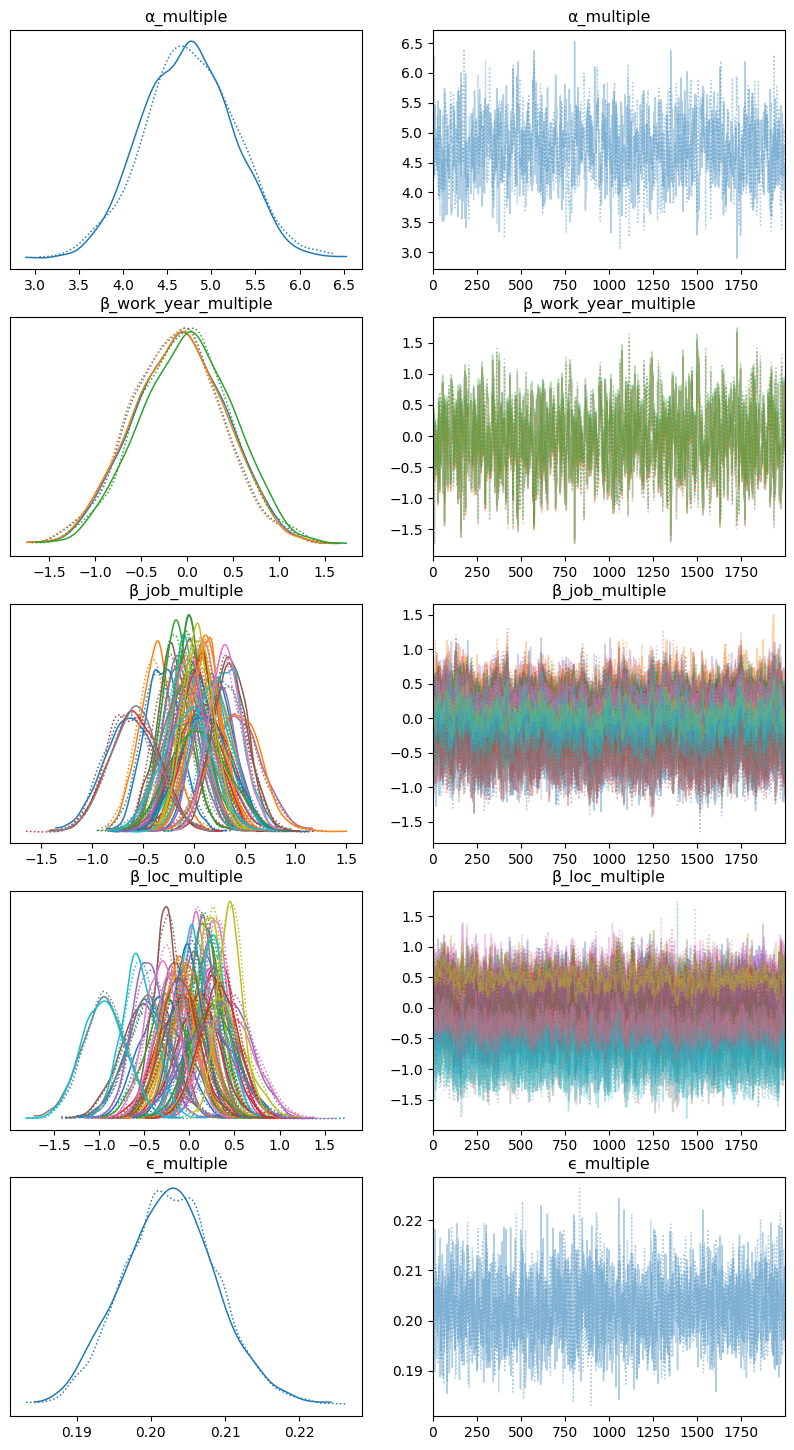

In [ ]:
# Affichage des traces des paramètres
az.plot_trace(sdata_2, figsize=(10, 18))
plt.savefig('B11197_03_03.png')

En somme, nous constatons que les traces semblent suivre une distribution normale. Cela suggère que le modèle a efficacement capturé la relation entre les variables explicatives et la variable dépendante. De plus, la présence de bruit indique qu'il n'y a pas de problèmes majeurs.
Dans la majorité des cas, les différentes couleurs se chevauchent étroitement et présentent des traces similaires, ce qui suggère que les différentes chaînes convergent vers la même région de l'espace des paramètres. Ce phénomène est un bon signe de convergence

In [ ]:
az.summary(sdata_2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α_multiple,4.751,0.515,3.740,5.662,0.017,0.012,871.0,1307.0,1.00
β_work_year_multiple[0],-0.097,0.506,-1.025,0.877,0.017,0.012,926.0,1301.0,1.00
β_work_year_multiple[1],-0.113,0.507,-1.048,0.850,0.017,0.012,924.0,1254.0,1.00
β_work_year_multiple[2],-0.018,0.507,-0.965,0.932,0.017,0.012,921.0,1238.0,1.00
β_job_multiple[0],-0.628,0.251,-1.072,-0.145,0.011,0.008,508.0,1620.0,1.00
...,...,...,...,...,...,...,...,...,...
β_loc_multiple[46],-0.303,0.182,-0.680,0.005,0.011,0.008,268.0,567.0,1.01
β_loc_multiple[47],-0.439,0.244,-0.901,0.023,0.011,0.008,485.0,847.0,1.00
β_loc_multiple[48],0.460,0.140,0.190,0.723,0.011,0.008,171.0,321.0,1.01
β_loc_multiple[49],-0.940,0.242,-1.372,-0.483,0.012,0.008,429.0,1381.0,1.00


Dans la majorité des cas, des valeurs élevées d'ess_bulk suggèrent une bonne efficacité de l'échantillonnage.De plus, un r_hat inférieur à 1,05 indique une bonne convergence.

In [ ]:
with regression_multiple:
    posterior_predictive_multiple = pm.sample_posterior_predictive(sdata_2)


predictions_multiple = posterior_predictive_multiple.posterior_predictive['y_pred_multiple']
# Calcul des prédictions moyennes
mean_predictions_multiple = predictions_multiple.mean(axis=(0, 1))

Avec pm.sample_posterior_predictive(sdata_2), nous générons des échantillons de valeurs de salaire prédites à partir du modèle postérieur, basé sur les paramètres estimés de notre modèle. Ensuite, en utilisant posterior_predictive_multiple.posterior_predictive['y_pred_multiple'], nous extrayons les prédictions de salaire pour chaque échantillon postérieur généré. Enfin, pour obtenir une prédiction moyenne pour chaque observation dans nos données, nous calculons la moyenne des prédictions pour chaque observation en prenant la moyenne sur les échantillons postérieurs avec mean_predictions_multiple = predictions_multiple.mean(axis=(0, 1)).

In [ ]:
y_true = salary_in_usd_log

In [ ]:
# Calcul de l'erreur quadratique moyenne (MSE)
squared_errors = (y_true - mean_predictions_multiple) ** 2
mse_multiple = np.mean(squared_errors).round(6)

# Calcul de l'erreur absolue moyenne (MAE)
absolute_errors = np.abs(y_true - mean_predictions_multiple)
mae_multiple = np.mean(absolute_errors).round(6)

# Calcul de la racine de l'erreur quadratique moyenne (RMSE)
rmse_multiple = np.sqrt(mse_multiple).round(6)

print("Mean Squared Error (MSE_multiple):", mse_multiple)
print("Mean Absolute Error (MAE_multiple):", mae_multiple)
print("Root Mean Squared Error (RMSE_multiple):", rmse_multiple)

Mean Squared Error (MSE_multiple): 0.034103
Mean Absolute Error (MAE_multiple): 0.126708
Root Mean Squared Error (RMSE_multiple): 0.18467


- Mean Squared Error (MSE_multiple) : C'est la moyenne des carrés des différences entre les valeurs prédites et les vraies valeurs.
- Mean Absolute Error (MAE_multiple) : C'est la moyenne des valeurs absolues des différences entre les valeurs prédites et les vraies valeurs.
- Root Mean Squared Error (RMSE_multiple) : C'est la racine carrée du MSE, ce qui donne une mesure de l'erreur dans la même unité que la variable cible.

Ces mesures sont utiles pour évaluer à quel point les prédictions du modèle correspondent aux vraies valeurs de la variable cible.

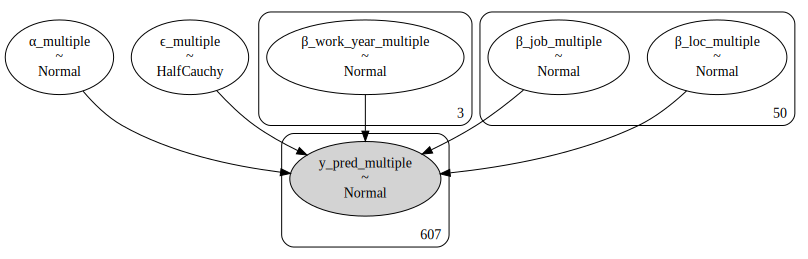

In [ ]:
pm.model_to_graphviz(regression_multiple)

Tout est correct, ce graphique illustre bien la structure du modèle probabiliste.

- α_multiple suit une distribution normale.
- ϵ_multiple suit une distribution halfcauchy.
- Les coefficients β_work_year_multiple, β_job_multiple et β_loc_multiple suivent tous une distribution normale.
- Il y a 3 coefficients β_work_year_multiple à l'intérieur du cercle, indiquant qu'il y a 3 variables indicatrices associées à l'année de travail.
- Il y a plusieurs coefficients β_job_multiple et β_loc_multiple à l'intérieur du cercle, indiquant les variables indicatrices associées aux emplois et aux emplacements.
- y_pred_multiple suit une distribution normale, représentant les prédictions du modèle pour les salaires.

# La régression robuste

In [ ]:
# Définition du modèle probabiliste
with pm.Model() as robust_regression_model:
    # Paramètres du modèle
    α_robust = pm.Normal('α_robust', mu=mean_log_salary, sigma=1)
    β_work_year_robust = pm.Normal('β_work_year_robust', mu=0, sigma=1,shape = work_year_encoded.shape[1])
    β_job_robust = pm.Normal('β_job_robust', mu=0, sigma=1, shape=job_title_encoded.shape[1])
    β_loc_robust = pm.Normal('β_loc_robust', mu=0, sigma=1, shape=location_encoded.shape[1])
    ϵ_robust = pm.HalfCauchy('ϵ_robust', 5)

    # Modèle linéaire
    μ_robust = α_robust + pm.math.dot(work_year_encoded.values, β_work_year_robust) + pm.math.dot(job_title_encoded.values, β_job_robust) + pm.math.dot(location_encoded.values, β_loc_robust)

    # Vraisemblance robuste avec distribution Student-T
    y_pred_robust = pm.StudentT('y_pred_robust', mu=μ_robust, sigma=ϵ_robust, nu=3, observed=salary_in_usd_log)

    # Échantillonnage des paramètres du modèle
    sdata_robust = pm.sample(2000)



Contrairement à une distribution normale, la distribution Student-T utilisée pour la variable y_pred_robust est plus robuste aux valeurs aberrantes, grâce au paramètre nu=3, qui contrôle le degré de liberté de la distribution.

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


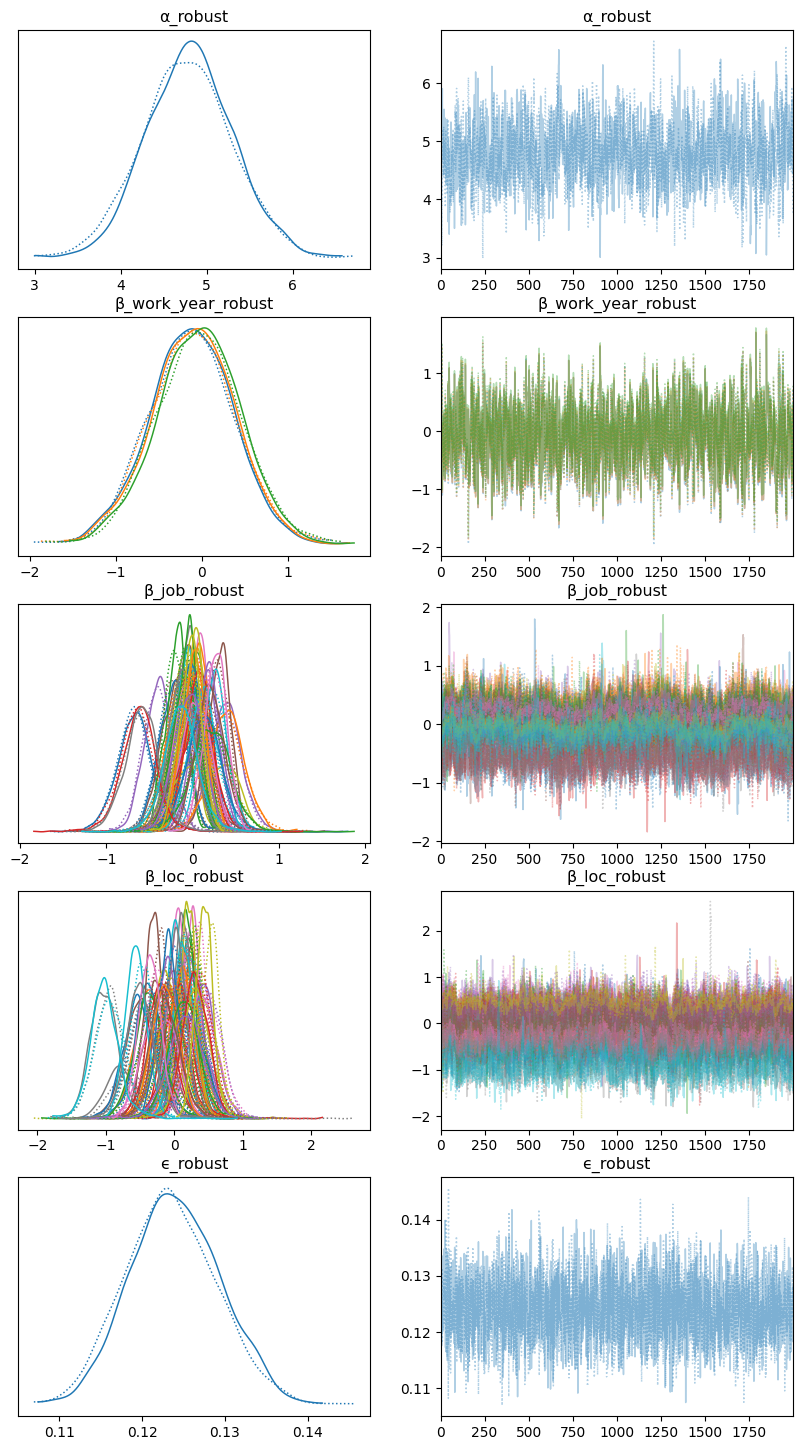

In [ ]:
az.plot_trace(sdata_robust, figsize=(10, 18))
plt.savefig('B11197_03_03.png')

 Dans ce cas également, les traces semblent principalement suivre une distribution normale, ce qui suggère une capture efficace de la relation entre les variables explicatives et la variable dépendante par le modèle. De plus, la présence de bruit indique l'absence de problèmes significatifs.





In [ ]:
az.summary(sdata_robust)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α_robust,4.792,0.518,3.848,5.797,0.018,0.013,795.0,1515.0,1.00
β_work_year_robust[0],-0.125,0.499,-1.070,0.808,0.014,0.010,1251.0,1711.0,1.00
β_work_year_robust[1],-0.100,0.499,-1.084,0.791,0.014,0.010,1241.0,1761.0,1.00
β_work_year_robust[2],-0.034,0.499,-1.034,0.844,0.014,0.010,1246.0,1831.0,1.00
β_job_robust[0],-0.670,0.219,-1.073,-0.248,0.013,0.009,274.0,1066.0,1.00
...,...,...,...,...,...,...,...,...,...
β_loc_robust[46],-0.323,0.172,-0.639,0.000,0.016,0.011,114.0,629.0,1.05
β_loc_robust[47],-0.463,0.254,-0.901,-0.026,0.013,0.009,336.0,1133.0,1.02
β_loc_robust[48],0.472,0.140,0.196,0.720,0.018,0.013,62.0,281.0,1.07
β_loc_robust[49],-0.977,0.241,-1.414,-0.538,0.013,0.009,323.0,1234.0,1.03


Dans ce cas,les valeurs d'« ess_bulk » inferieurs à 400 pour β_job_robust et β_loc_robust.Generalement, les r_hat inférieurs à 1,05, qui indique une bonne convergence.

In [ ]:
with robust_regression_model:
    posterior_predictive_robust = pm.sample_posterior_predictive(sdata_robust)


predictions_robust = posterior_predictive_robust.posterior_predictive['y_pred_robust']
# Calcul des prédictions moyennes
mean_predictions_robust = predictions_robust.mean(axis=(0, 1))

In [ ]:
# Calcul de l'erreur quadratique moyenne (MSE)
squared_errors = (y_true - mean_predictions_robust) ** 2
mse_robust = np.mean(squared_errors).round(6)

# Calcul de l'erreur absolue moyenne (MAE)
absolute_errors = np.abs(y_true - mean_predictions_robust)
mae_robust = np.mean(absolute_errors).round(6)

# Calcul de la racine de l'erreur quadratique moyenne (RMSE)
rmse_robust = np.sqrt(mse_robust).round(6)

print("Mean Squared Error (MSE_robust):", mse_robust)
print("Mean Absolute Error (MAE_robust):", mae_robust)
print("Root Mean Squared Error (RMSE_robust):", rmse_robust)

Mean Squared Error (MSE_robust): 0.037274
Mean Absolute Error (MAE_robust): 0.123227
Root Mean Squared Error (RMSE_robust): 0.193065


La régression robuste est conçue pour être moins sensible aux valeurs aberrantes que la régression linéaire multiple. Si les données contiennent des valeurs aberrantes, la régression robuste pourrait mieux s'adapter à ces points atypiques, ce qui pourrait expliquer pourquoi elle a un MAE plus faible malgré des valeurs RMSE et MSE plus élevées.

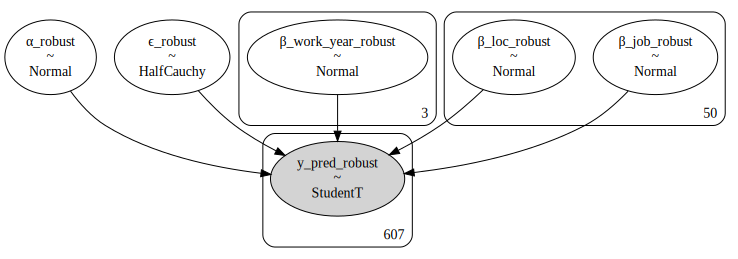

In [ ]:
pm.model_to_graphviz(robust_regression_model)

Tout est correct, ce graphique illustre bien la structure du modèle probabiliste.

- α_robust suit une distribution normale.
- ϵ_robust suit une distribution halfcauchy.
- Les coefficients β_work_year_robust, β_job_robust et β_loc_robust suivent tous une distribution normale.
- y_pred_robust suit une Student-T.

# Comparaison des modèles

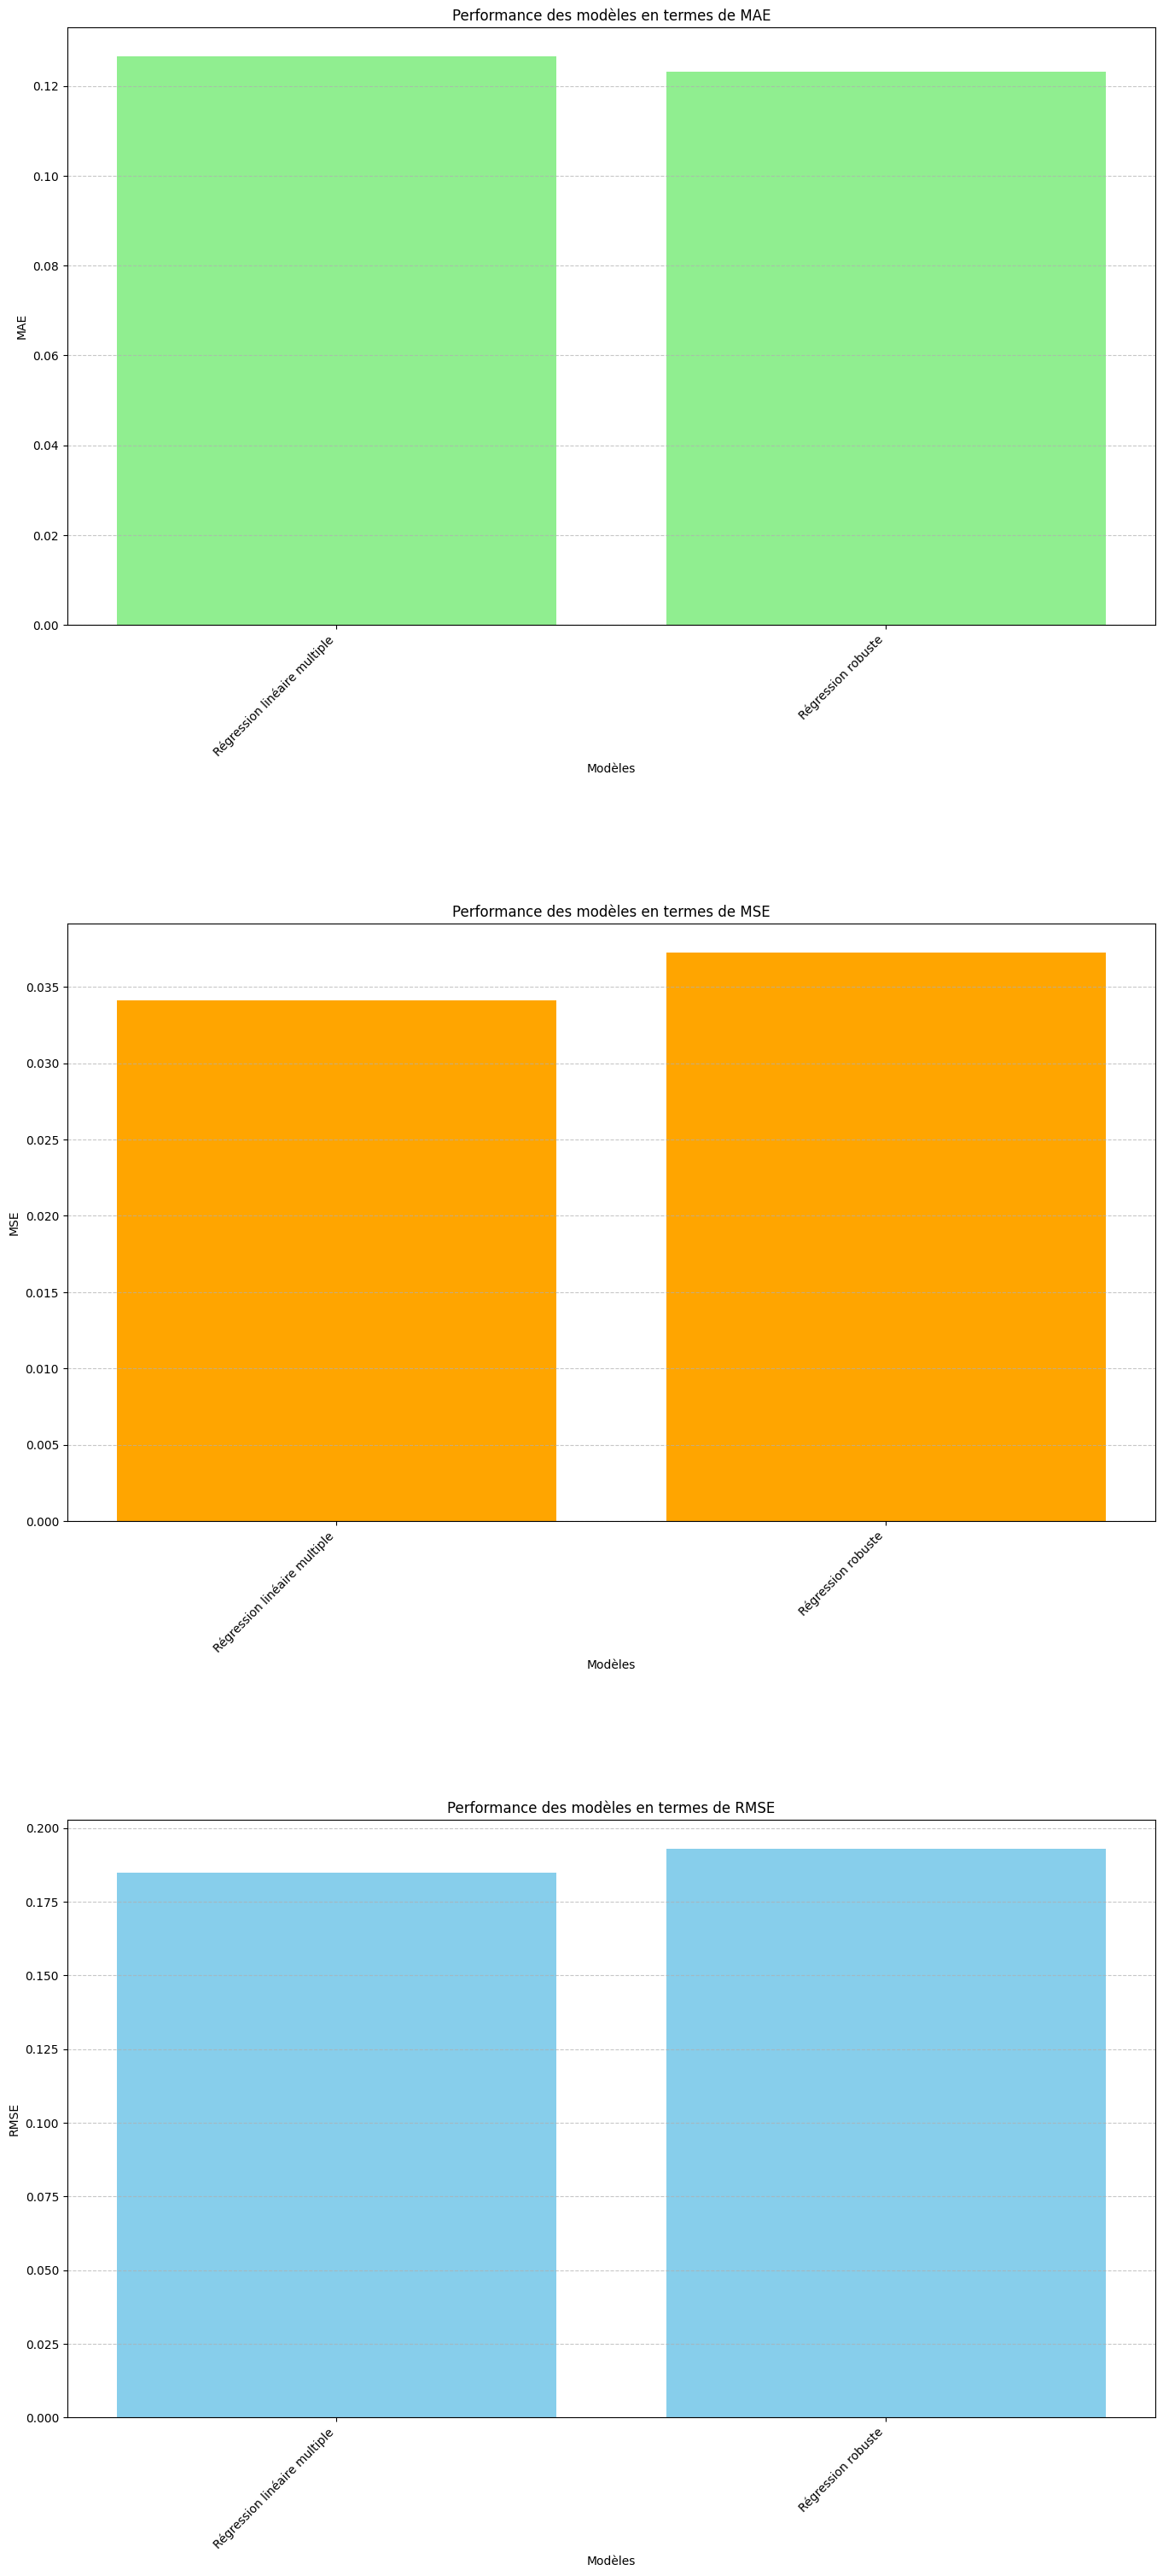

In [ ]:
#MAE
plt.figure(figsize=(15,4))
plt.subplot(311)
modeles = ['Régression linéaire multiple', 'Régression robuste']
MEA = [0.126708,0.123227]


plt.bar(modeles, MEA, color='lightgreen')
plt.title('Performance des modèles en termes de MAE')
plt.xlabel('Modèles')
plt.ylabel('MAE')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

#MSE
plt.subplot(312)
modeles = ['Régression linéaire multiple', 'Régression robuste']
MSE = [0.034103,0.037274]


plt.bar(modeles, MSE, color='orange')
plt.title('Performance des modèles en termes de MSE')
plt.xlabel('Modèles')
plt.ylabel('MSE')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes sur l'axe x pour une meilleure lisibilité
plt.grid(axis='y', linestyle='--', alpha=0.7)


##RMSE
plt.subplot(313)
modeles = ['Régression linéaire multiple', 'Régression robuste']
RMSE = [0.18467, 0.193065]

plt.bar(modeles, RMSE, color='skyblue')
plt.title('Performance des modèles en termes de RMSE')
plt.xlabel('Modèles')
plt.ylabel('RMSE')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.subplots_adjust(top=10, bottom=3, left=0.10, right=0.95, hspace=0.5, wspace=0.40)


plt.show()

 La régression linéaire multiple a de meilleures performances globales en termes de RMSE et de MSE, ce qui peut indiquer qu'elle s'en sort mieux sur l'ensemble des données.